In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
def linear_eval(x, y, b):
    y_pred = x.dot(b)
    mse = ((y - y_pred) ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

def linear_regress(x, y, b=None, epochs=5, learning_rate=0.001, error_log=None):
    n = x.shape[0]
    x = x.reshape(n,-1)
    y = y.reshape(n,-1)
    x = np.concatenate((np.ones((n,1)), x), axis=1)
    
    if b is None:
        b = np.zeros(x.shape[-1])
    
    for epoch in range(1, epochs+1):
        for i in range(n):
            x_data, y_data = x[i], y[i]
            y_pred = x_data.dot(b)
            # print(x_data, y_data, b, y_pred, (y_data-y_pred) * x_data[1])

            b += learning_rate * (y_data - y_pred) * x_data
            
            if error_log is not None:
                error_log.append({'coef': b[1],
                                  'intercept': b[0],
                                  'error': linear_eval(x, y, b)})
        
        print(learning_rate * (y_data - y_pred) * x_data[0])
        print(f"Epoch: {epoch} ---> RMSE: {linear_eval(x, y, b)}")
    
    return b

def linear_predict(x, b):
    n = x.shape[0]
    x = x.reshape(n,-1)  
    x = np.concatenate((np.ones((n,1)), x), axis=1)
    return x.dot(b)

def linear_mse(x, y, b):
    n = x.shape[0]
    x, y = x.reshape(n, -1), y.reshape(n, -1)
    if b.shape[-1] != x.shape[-1]:
        x = np.concatenate((np.ones((n,1)), x), axis=1)
    y_pred = x.dot(b)
    y, y_pred = y.flatten(), y_pred.flatten()
    error = y - y_pred
    mse = error ** 2
    return mse.mean()

In [27]:
def eval(x, y, b):
    z = x.dot(b)
    y_pred = np.power(1 + np.power(np.exp(1), (-1 * z)), -1)
    y, y_pred = y.flatten(), y_pred.flatten()
    log_loss = y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred) 
    log_loss *= -1
    return log_loss.mean()

def mse(x, y, b):
    n = x.shape[0]
    x, y = x.reshape(n, -1), y.reshape(n, -1)
    if b.shape[-1] != x.shape[-1]:
        x = np.concatenate((np.ones((n,1)), x), axis=1)
    z = x.dot(b)
    y_pred = np.power(1 + np.power(np.exp(1), (-1 * z)), -1)
    y, y_pred = y.flatten(), y_pred.flatten()
    error = y - y_pred
    mse = error ** 2
    return mse.mean()

def eval_accuracy(x, y, b):
    n = x.shape[0]
    z = x.dot(b)
    
    y_pred = np.power(1 + np.power(np.exp(1), (-1 * z)), -1)
    
    y_pred = np.where(y_pred < .5, 0, 1)
    error = np.absolute(y.flatten() - y_pred.flatten())
    incorrect = error.sum()
    correct = n - incorrect
    acc = correct / n * 100
    return acc

def regress(x, y, b=None, epochs=5, learning_rate=0.001, error_log=None):
    n = x.shape[0]
    x = x.reshape(n,-1)
    y = y.reshape(n,-1)
    x = np.concatenate((np.ones((n,1)), x), axis=1)
    
    if b is None:
        b = np.zeros(x.shape[-1])
    
    for epoch in range(1, epochs+1):
        for i in range(n):
            x_data, y_data = x[i], y[i]
            z = x_data.dot(b)
            y_pred = 1 / (1 + np.power(np.exp(1), (-1 * z)))
            # print(x_data, y_data, b, y_pred, (y_data-y_pred) * x_data[1])

            b += learning_rate * (y_data - y_pred) * x_data
            
            if error_log is not None:
                error_log.append(eval(x, y, b))
        
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} ---> Accuracy: {eval_accuracy(x, y, b)}, Log-Loss: {eval(x, y, b)}")
    
    return b

def predict(x, b):
    n = x.shape[0]
    x = x.reshape(n,-1)  
    x = np.concatenate((np.ones((n,1)), x), axis=1)
    z = x.dot(b)
    y_pred = np.power(1 + np.power(np.exp(1), (-1 * z)), -1)
    y_pred = np.where(y_pred < .5, 0, 1)
    return y_pred
    

---------------------
### Question 1
---------------------

In [145]:
df = pd.read_csv('exp.csv')
df.head(3)

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9


In [146]:
x, y = df.salary.values, df.experience.values
x.shape, y.shape

((12,), (12,))

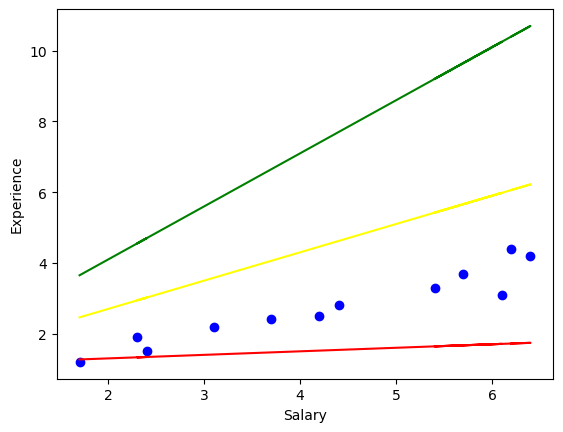

In [45]:
fig = plt.figure()

plt.scatter(x, y, color='blue')

plt.plot(x, linear_predict(x, np.array([1.1, .1])), color='red')

plt.plot(x, linear_predict(x, np.array([1.1, .8])), color='yellow')

plt.plot(x, linear_predict(x, np.array([1.1, 1.5])), color='green')

plt.xlabel("Salary")
plt.ylabel("Experience")

plt.show()

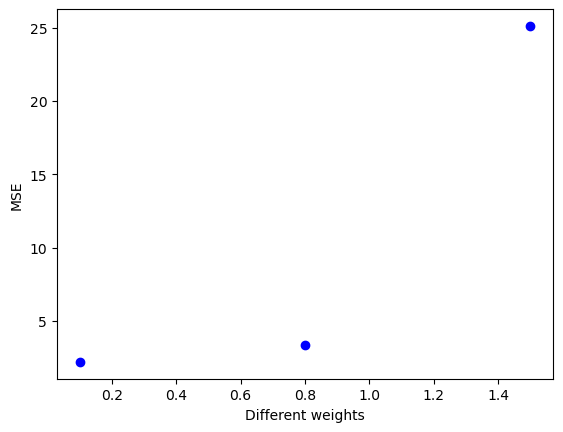

In [46]:
fig = plt.figure()

b1_lst = [.1, .8, 1.5]
mse_lst = [linear_mse(x, y, np.array((1.1, b_val))) for b_val in b1_lst]

plt.scatter(b1_lst, mse_lst, color='blue')

plt.xlabel("Different weights")
plt.ylabel("MSE")

plt.show()

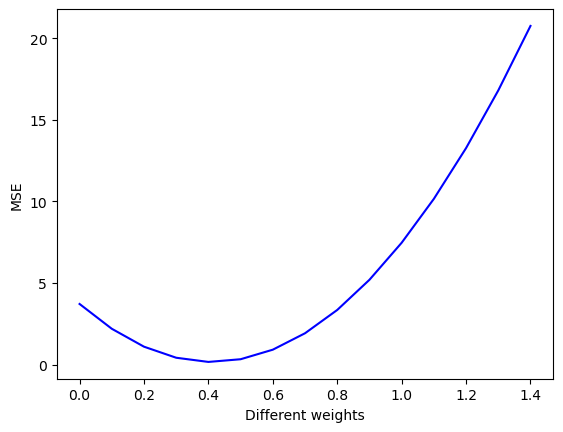

In [49]:
b0 = 1.1

fig = plt.figure()

b1_lst = np.arange(0.0, 1.5, .1)
mse_lst = [linear_mse(x, y, np.array((b0, b_val))) for b_val in b1_lst]

plt.plot(b1_lst, mse_lst, color='blue')

plt.xlabel("Different weights")
plt.ylabel("MSE")

plt.show()

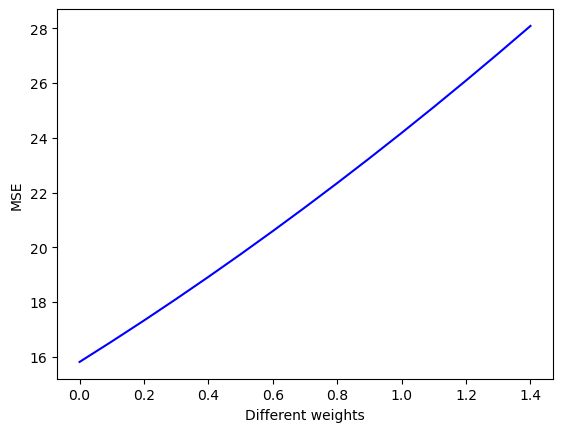

In [81]:
b1 = 1.5

fig = plt.figure()

b0_lst = np.arange(0.0, 1.5, .1)
mse_lst = [linear_mse(x, y, np.array((b_val, b1))) for b_val in b0_lst]

plt.plot(b0_lst, mse_lst, color='blue')

plt.xlabel("Different weights")
plt.ylabel("MSE")

plt.show()

-------------------------
### Question 4
-------------------------

In [147]:
b = linear_regress(x, y, learning_rate = 0.001, epochs = 10)
print("Coefficients: ", b)

[0.00362362]
Epoch: 1 ---> RMSE: 2.343078871907847
[0.00289098]
Epoch: 2 ---> RMSE: 1.935691466168679
[0.00233014]
Epoch: 3 ---> RMSE: 1.6689605295179581
[0.00190081]
Epoch: 4 ---> RMSE: 1.5059668609973282
[0.00157216]
Epoch: 5 ---> RMSE: 1.4141579013574233
[0.00132058]
Epoch: 6 ---> RMSE: 1.3673504910443974
[0.00112799]
Epoch: 7 ---> RMSE: 1.3468271706955335
[0.00098058]
Epoch: 8 ---> RMSE: 1.3405425332314769
[0.00086773]
Epoch: 9 ---> RMSE: 1.3413452335761213
[0.00078136]
Epoch: 10 ---> RMSE: 1.3452445024044073
Coefficients:  [0.12108497 0.56909186]


In [148]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor

n = x.shape[0]
x = x.reshape(n, -1)
y = y.reshape(n, -1)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)

rmse_sklearn = np.sqrt(((y - y_pred) ** 2).mean())
rmse_sklearn

0.29399995137034024

In [149]:
model.coef_, model.intercept_

(array([[0.57968648]]), array([0.27401481]))

In [160]:
sklearn_log = []
model = SGDRegressor(max_iter = 5)
for i in range(60):
    if i == 0:
        model.fit(x, y, coef_init = 0, intercept_init = 0)
    else:
        model.fit(x, y, coef_init = model.coef_, intercept_init = model.intercept_)
    rmse = np.sqrt(((y.flatten() - model.predict(x).flatten()) ** 2).mean())
    sklearn_log.append({'coef': model.coef_[0], 'intercept': model.intercept_[0], 'error': rmse})

print(sklearn_log)

[{'coef': 0.6078517060836667, 'intercept': 0.13241909901585167, 'error': 0.29812715781989196}, {'coef': 0.6096286242976675, 'intercept': 0.13686019391899015, 'error': 0.29798362247125604}, {'coef': 0.6051469366018484, 'intercept': 0.14074760932393818, 'error': 0.2977513779132525}, {'coef': 0.6095739125269669, 'intercept': 0.14708935628119052, 'error': 0.2978553331396355}, {'coef': 0.60725908298114, 'intercept': 0.15089234361045759, 'error': 0.2973157717060585}, {'coef': 0.6052451980560047, 'intercept': 0.15477103430404832, 'error': 0.2969681840334724}, {'coef': 0.6000941621498506, 'intercept': 0.1576850261943066, 'error': 0.2971789078030075}, {'coef': 0.5966310147206083, 'intercept': 0.16092130696743306, 'error': 0.29797183176215974}, {'coef': 0.601561102956861, 'intercept': 0.16440878208320608, 'error': 0.2964769690624222}, {'coef': 0.5938983981874645, 'intercept': 0.16713717570041467, 'error': 0.2984056215634113}, {'coef': 0.6111625530751155, 'intercept': 0.1742821415034301, 'error':

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/utils

In [162]:
sklearn_log = []
model = SGDRegressor()
for i in range(60):
    for j in range(5):
        model.partial_fit(x, y)
    rmse = np.sqrt(((y.flatten() - model.predict(x).flatten()) ** 2).mean())
    sklearn_log.append({'coef': model.coef_[0], 'intercept': model.intercept_[0], 'error': rmse})

print(sklearn_log)

[{'coef': 0.6181166617406576, 'intercept': 0.12934946391235574, 'error': 0.30104516833986683}, {'coef': 0.6047095826238125, 'intercept': 0.13027337689954283, 'error': 0.2988979128203984}, {'coef': 0.6117545144000482, 'intercept': 0.13448372874769846, 'error': 0.2984337199712557}, {'coef': 0.6037704472411415, 'intercept': 0.13557870963222923, 'error': 0.29855033371942025}, {'coef': 0.6054921565868208, 'intercept': 0.13846845617353565, 'error': 0.29789172867366337}, {'coef': 0.6093285229591215, 'intercept': 0.14151325250300367, 'error': 0.297831167843956}, {'coef': 0.6082440282558613, 'intercept': 0.14335229389563367, 'error': 0.297621908346331}, {'coef': 0.6071772223723689, 'intercept': 0.14506064041633107, 'error': 0.29745554841569466}, {'coef': 0.607177738064742, 'intercept': 0.14691960269873536, 'error': 0.29739426138316133}, {'coef': 0.6039540541577164, 'intercept': 0.14814205510730064, 'error': 0.29732455469388497}, {'coef': 0.6059393258156114, 'intercept': 0.15026538130339945, 'er

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

In [163]:
error_log = []

for i in range(60):
    if i==0:
        b = linear_regress(x, y, learning_rate = 0.001, epochs = 5, error_log = error_log)
    else:
        b = linear_regress(x, y, b = b, learning_rate = 0.001, epochs = 5, error_log = error_log)

print(error_log[-1])

[0.00362362]
Epoch: 1 ---> RMSE: 2.343078871907847
[0.00289098]
Epoch: 2 ---> RMSE: 1.935691466168679
[0.00233014]
Epoch: 3 ---> RMSE: 1.6689605295179581
[0.00190081]
Epoch: 4 ---> RMSE: 1.5059668609973282
[0.00157216]
Epoch: 5 ---> RMSE: 1.4141579013574233
[0.00132058]
Epoch: 1 ---> RMSE: 1.3673504910443974
[0.00112799]
Epoch: 2 ---> RMSE: 1.3468271706955335
[0.00098058]
Epoch: 3 ---> RMSE: 1.3405425332314769
[0.00086773]
Epoch: 4 ---> RMSE: 1.3413452335761213
[0.00078136]
Epoch: 5 ---> RMSE: 1.3452445024044073
[0.00071525]
Epoch: 1 ---> RMSE: 1.350135121469735
[0.00066465]
Epoch: 2 ---> RMSE: 1.3549800001452486
[0.00062593]
Epoch: 3 ---> RMSE: 1.3593232661545303
[0.0005963]
Epoch: 4 ---> RMSE: 1.363012403245831
[0.00057362]
Epoch: 5 ---> RMSE: 1.3660443183661433
[0.00055627]
Epoch: 1 ---> RMSE: 1.3684823546529659
[0.00054301]
Epoch: 2 ---> RMSE: 1.3704130320999401
[0.00053286]
Epoch: 3 ---> RMSE: 1.3719246307785602
[0.0005251]
Epoch: 4 ---> RMSE: 1.3730975363490552
[0.00051917]
Epoch

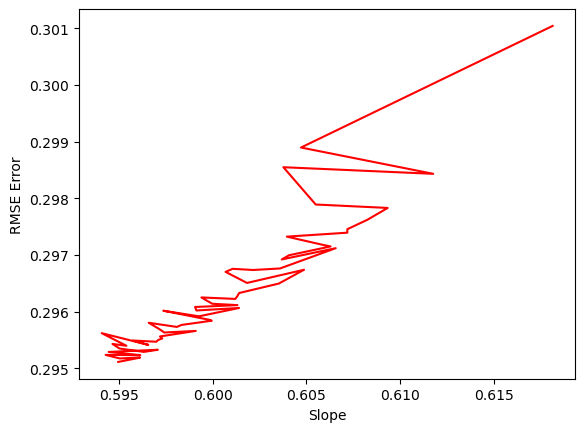

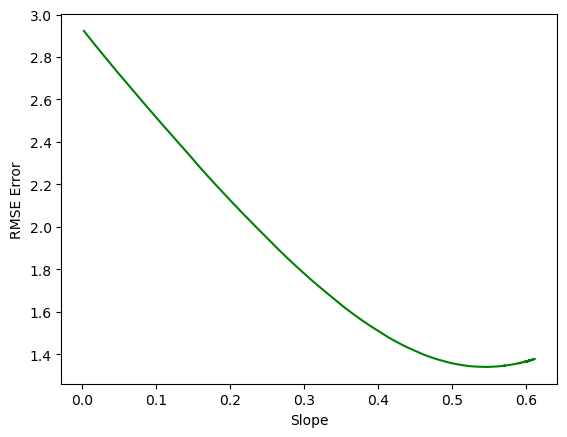

In [164]:
fig = plt.figure()

graph_x = [log['coef'] for log in sklearn_log]
graph_y = [log['error'] for log in sklearn_log]

plt.xlabel('Slope')
plt.ylabel('RMSE Error')

plt.plot(graph_x, graph_y, color='red')

fig = plt.figure()
graph_x = [log['coef'] for log in error_log]
graph_y = [log['error'] for log in error_log]

plt.xlabel('Slope')
plt.ylabel('RMSE Error')

plt.plot(graph_x, graph_y, color='green')

plt.show()

-----------------------------
### Question 5
-----------------------------

In [ ]:
x = np.array([1, 2, 4, 3, 5])
y = np.array([1, 3, 3, 2, 5])

In [122]:
error_log = []
b = linear_regress(x, y, learning_rate = 0.001, epochs = 10, error_log = error_log)
b

[0.00362362]
Epoch: 1 ---> RMSE: 2.343078871907847
[0.00289098]
Epoch: 2 ---> RMSE: 1.935691466168679
[0.00233014]
Epoch: 3 ---> RMSE: 1.6689605295179581
[0.00190081]
Epoch: 4 ---> RMSE: 1.5059668609973282
[0.00157216]
Epoch: 5 ---> RMSE: 1.4141579013574233
[0.00132058]
Epoch: 6 ---> RMSE: 1.3673504910443974
[0.00112799]
Epoch: 7 ---> RMSE: 1.3468271706955335
[0.00098058]
Epoch: 8 ---> RMSE: 1.3405425332314769
[0.00086773]
Epoch: 9 ---> RMSE: 1.3413452335761213
[0.00078136]
Epoch: 10 ---> RMSE: 1.3452445024044073


array([0.12108497, 0.56909186])

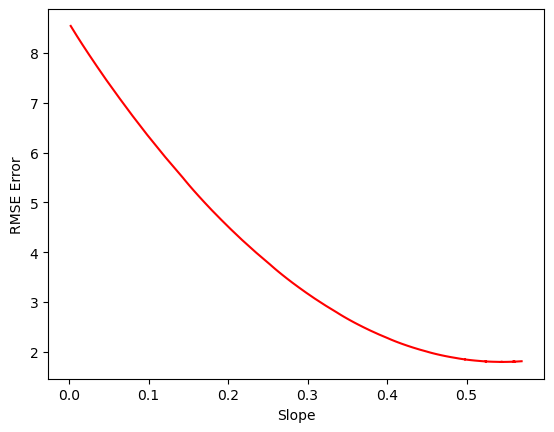

In [123]:
fig = plt.figure()
graph_x = [log['coef'] for log in error_log]
graph_y = [log['error'] ** 2 for log in error_log]

plt.plot(graph_x, graph_y, color='red')

plt.xlabel('Slope')
plt.ylabel('RMSE Error')

plt.show()

In [142]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 8, 6, 4, 2])

error_log = []
b = linear_regress(x, y, learning_rate = 0.01, epochs = 1000, error_log = error_log)

for i in error_log:
    print(i)

[-0.00708065]
Epoch: 1 ---> RMSE: 5.261011982096561
[-0.02460411]
Epoch: 2 ---> RMSE: 4.6333530118255295
[-0.03351934]
Epoch: 3 ---> RMSE: 4.333949388620241
[-0.0379671]
Epoch: 4 ---> RMSE: 4.179026876820143
[-0.04009712]
Epoch: 5 ---> RMSE: 4.090297047806059
[-0.04102542]
Epoch: 6 ---> RMSE: 4.033428966436368
[-0.04133139]
Epoch: 7 ---> RMSE: 3.9925683839758417
[-0.04131579]
Epoch: 8 ---> RMSE: 3.960048166721174
[-0.04113477]
Epoch: 9 ---> RMSE: 3.9320401102387406
[-0.04086938]
Epoch: 10 ---> RMSE: 3.906594855944597
[-0.04056168]
Epoch: 11 ---> RMSE: 3.8827080437940635
[-0.04023349]
Epoch: 12 ---> RMSE: 3.859858197595536
[-0.03989613]
Epoch: 13 ---> RMSE: 3.83777273894196
[-0.03955546]
Epoch: 14 ---> RMSE: 3.8163079692556208
[-0.03921452]
Epoch: 15 ---> RMSE: 3.795387077058145
[-0.03887487]
Epoch: 16 ---> RMSE: 3.7749679985471642
[-0.0385373]
Epoch: 17 ---> RMSE: 3.755026723481954
[-0.03820221]
Epoch: 18 ---> RMSE: 3.7355486155057065
[-0.03786981]
Epoch: 19 ---> RMSE: 3.71652389736929

[-1.21298968e-05]
Epoch: 939 ---> RMSE: 3.999185395818927
[-1.20242723e-05]
Epoch: 940 ---> RMSE: 3.99919248792037
[-1.19195675e-05]
Epoch: 941 ---> RMSE: 3.999199518287791
[-1.18157745e-05]
Epoch: 942 ---> RMSE: 3.9992064874583657
[-1.17128853e-05]
Epoch: 943 ---> RMSE: 3.9992133959646003
[-1.16108921e-05]
Epoch: 944 ---> RMSE: 3.9992202443343707
[-1.15097869e-05]
Epoch: 945 ---> RMSE: 3.999227033090963
[-1.14095622e-05]
Epoch: 946 ---> RMSE: 3.9992337627531125
[-1.13102102e-05]
Epoch: 947 ---> RMSE: 3.9992404338350434
[-1.12117234e-05]
Epoch: 948 ---> RMSE: 3.9992470468465102
[-1.11140941e-05]
Epoch: 949 ---> RMSE: 3.9992536022928316
[-1.1017315e-05]
Epoch: 950 ---> RMSE: 3.9992601006749346
[-1.09213786e-05]
Epoch: 951 ---> RMSE: 3.9992665424893894
[-1.08262776e-05]
Epoch: 952 ---> RMSE: 3.999272928228448
[-1.07320048e-05]
Epoch: 953 ---> RMSE: 3.9992792583800805
[-1.06385528e-05]
Epoch: 954 ---> RMSE: 3.999285533428015
[-1.05459146e-05]
Epoch: 955 ---> RMSE: 3.9992917538517725
[-1.0

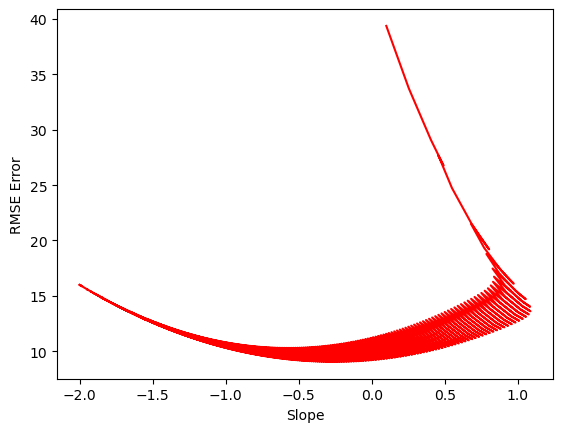

In [143]:
fig = plt.figure()
graph_x = [log['coef'] for log in error_log]
graph_y = [log['error'] ** 2 for log in error_log]

plt.plot(graph_x, graph_y, color='red')

plt.xlabel('Slope')
plt.ylabel('RMSE Error')

plt.show()